## Learning

In [1]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.core import Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
%run "Preprocessing data for keras.ipynb"

Using TensorFlow backend.


In [2]:
#creates the neural  network model
model = Sequential([
    Dense(16, input_shape=(1,),activation='relu'),
    Dense(32,activation='relu'),
    Dense(2,activation='softmax'),
])

In [3]:
# Compiles the model
#model.compile(Optimizer(learning reate),loss='function loss',metrics=['accuracy'])
model.compile(Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [4]:
model.fit(scaled_train_samples, train_labels,validation_split=.20,batch_size=10 ,epochs=20 , shuffle=True, verbose=2)

Train on 1680 samples, validate on 420 samples
Epoch 1/20
 - 1s - loss: 0.7091 - accuracy: 0.4946 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/20
 - 0s - loss: 0.6781 - accuracy: 0.8214 - val_loss: 0.6782 - val_accuracy: 0.6643
Epoch 3/20
 - 1s - loss: 0.6485 - accuracy: 0.8339 - val_loss: 0.6645 - val_accuracy: 0.6738
Epoch 4/20
 - 0s - loss: 0.6205 - accuracy: 0.8399 - val_loss: 0.6519 - val_accuracy: 0.6690
Epoch 5/20
 - 0s - loss: 0.5913 - accuracy: 0.8315 - val_loss: 0.6400 - val_accuracy: 0.6738
Epoch 6/20
 - 0s - loss: 0.5602 - accuracy: 0.8476 - val_loss: 0.6284 - val_accuracy: 0.6738
Epoch 7/20
 - 0s - loss: 0.5276 - accuracy: 0.8548 - val_loss: 0.6182 - val_accuracy: 0.6810
Epoch 8/20
 - 0s - loss: 0.4941 - accuracy: 0.8649 - val_loss: 0.6097 - val_accuracy: 0.6762
Epoch 9/20
 - 0s - loss: 0.4611 - accuracy: 0.8714 - val_loss: 0.6031 - val_accuracy: 0.6810
Epoch 10/20
 - 0s - loss: 0.4288 - accuracy: 0.8827 - val_loss: 0.5986 - val_accuracy: 0.6929
Epoch 11/20
 - 0s - lo

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Set validation input
#model.compile(Adam(learning rate),loss='loss Fuction',metrics=['accuracy'])
#Validation set=[(sample,label),(sample,label),...,(sample,label)]
#model.fit(Train samples, Train labels,Validation Set,batch size, epochs , shuffle, verbose)

In [7]:
#make predictions
predictions = model.predict(scaled_train_samples,batch_size=10, verbose=0)
predictions

array([[0.92837286, 0.07162715],
       [0.27827927, 0.72172076],
       [0.61287856, 0.38712144],
       ...,
       [0.05902202, 0.940978  ],
       [0.61287856, 0.38712144],
       [0.15986487, 0.8401351 ]], dtype=float32)

In [18]:
#predict classes for testing
rounded_predictions = model.predict_classes(scaled_test_samples,batch_size=10, verbose=0)
len(rounded_predictions)

30

In [19]:
#Confusion matrix
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [27]:
#function to plot confusion matrix
def plot_confusion_matrix(cm,classes,normalize=False,
                         title="Confusion Matrix",
                         cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix without normalization")
    print(cm)
    
    thresh=cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
        horizontalalignment="center",
        color="white" if cm[i,j]>thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [20]:
#creates confusion matrix object
cm = confusion_matrix(test_labels,rounded_predictions)

Confusion matrix without normalization
[[ 9  6]
 [ 4 11]]


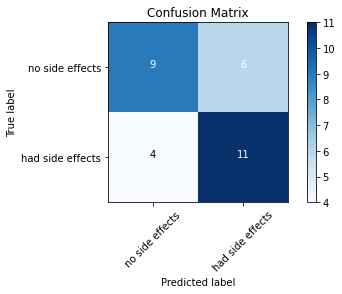

In [28]:
cm_plot_labels=["no side effects","had side effects"]
plot_confusion_matrix(cm,cm_plot_labels,title="Confusion Matrix")

In [32]:
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    print(i,j)

0 0
0 1
1 0
1 1
